In [1]:
import numpy as np
import pandas as pd

In [2]:
trans=pd.DataFrame({"A":[12,4,5,None,1],
                    "B":[7,2,54,3,None],
                    "C":[20,16,11,3,8],
                    "D":[14,3,None,2,6]},
                    index=['Row_1','Row_2','Row_3','Row_4','Row_5'])
trans

,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [5]:
result=trans.transform(lambda x : x+10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [6]:
result2=trans.transform([np.sqrt,np.exp])
result2

A                        B                       C  \
           sqrt            exp      sqrt           exp      sqrt   
Row_1  3.464102  162754.791419  2.645751  1.096633e+03  4.472136   
Row_2  2.000000      54.598150  1.414214  7.389056e+00  4.000000   
Row_3  2.236068     148.413159  7.348469  2.830753e+23  3.316625   
Row_4       NaN            NaN  1.732051  2.008554e+01  1.732051   
Row_5  1.000000       2.718282       NaN           NaN  2.828427   

                            D                
                exp      sqrt           exp  
Row_1  4.851652e+08  3.741657  1.202604e+06  
Row_2  8.886111e+06  1.732051  2.008554e+01  
Row_3  5.987414e+04       NaN           NaN  
Row_4  2.008554e+01  1.414214  7.389056e+00  
Row_5  2.980958e+03  2.449490  4.034288e+02

In [7]:
x=np.random.randint(10,200,size=10)
x

array([172,  50, 100, 147, 108,  85,  77, 137, 169, 146])

In [8]:
np.digitize(x,bins=[50])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
np.digitize(x,bins=[50,100])

array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2], dtype=int32)

In [10]:
df=pd.DataFrame({"height":x})
df

,height
0,172
1,50
2,100
3,147
4,108
5,85
6,77
7,137
8,169
9,146


In [14]:
df['binned']=pd.cut(x=df['height'],bins=[0,25,50,100,200])
df

,height,binned
0,172,"(100, 200]"
1,50,"(25, 50]"
2,100,"(50, 100]"
3,147,"(100, 200]"
4,108,"(100, 200]"
5,85,"(50, 100]"
6,77,"(50, 100]"
7,137,"(100, 200]"
8,169,"(100, 200]"
9,146,"(100, 200]"


In [18]:
df['bin_lable']=pd.cut(x=df['height'],bins=[0,25,50,100,200],labels=[1,2,3,4])
df

,height,binned,bin_lable
0,172,"(100, 200]",4
1,50,"(25, 50]",2
2,100,"(50, 100]",3
3,147,"(100, 200]",4
4,108,"(100, 200]",4
5,85,"(50, 100]",3
6,77,"(50, 100]",3
7,137,"(100, 200]",4
8,169,"(100, 200]",4
9,146,"(100, 200]",4


In [19]:
pd.qcut(df['height'],q=5)

0    (151.4, 172.0]
1    (49.999, 83.4]
2     (83.4, 104.8]
3    (140.6, 151.4]
4    (104.8, 140.6]
5     (83.4, 104.8]
6    (49.999, 83.4]
7    (104.8, 140.6]
8    (151.4, 172.0]
9    (140.6, 151.4]
Name: height, dtype: category
Categories (5, interval[float64]): [(49.999, 83.4] < (83.4, 104.8] < (104.8, 140.6] < (140.6, 151.4] < (151.4, 172.0]]

In [22]:
degrees=["none","cum laude","magna cum laude","summa cum laude"]
student_results=[3.93,3.24,2.80,2.83,3.91,3.698,3.731,3.25,3.24,3.82,3.22]
student_results.sort(reverse=True)

student_results_degrees=pd.cut(student_results,[0,3.6,3.8,3.9,4.0],labels=degrees)
honor=pd.DataFrame({'grades':student_results,'honors':student_results_degrees})
honor

,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


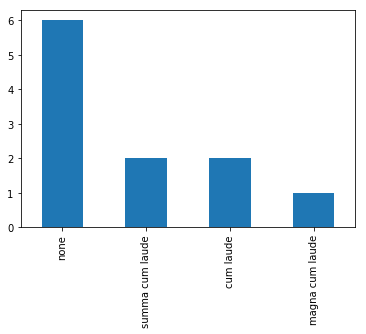

In [23]:
pd.value_counts(student_results_degrees).plot.bar()